<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/LDA_Handson_(12_07_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Good Morning Guys let us wait for everyone to join the session we will be starting the session by 10:10 AM

1. What is the primary goal of Linear Discriminant Analysis (LDA)?

* A. To maximize the variance of data
* B. To minimize the correlation between features
* C. To reduce dimensionality while preserving class separability
* D. To cluster the data based on similarity

3.In LDA, what does the term "n-1" refer to in the context of scatter matrix calculation?

* A. Number of features minus 1
* B. Number of classes minus 1
* C. Number of samples minus 1, for unbiased variance
* D. Number of eigenvectors used

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import *
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Loading

The data is from load_digits(), as the data we are having is in the form of dictionary

In [ ]:
digits = load_digits()  # loading the dataset

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
# Lets create a Dataframe

In [ ]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [ ]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
print(df.to_string())

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  pixel_1_2  pixel_1_3  pixel_1_4  pixel_1_5  pixel_1_6  pixel_1_7  pixel_2_0  pixel_2_1  pixel_2_2  pixel_2_3  pixel_2_4  pixel_2_5  pixel_2_6  pixel_2_7  pixel_3_0  pixel_3_1  pixel_3_2  pixel_3_3  pixel_3_4  pixel_3_5  pixel_3_6  pixel_3_7  pixel_4_0  pixel_4_1  pixel_4_2  pixel_4_3  pixel_4_4  pixel_4_5  pixel_4_6  pixel_4_7  pixel_5_0  pixel_5_1  pixel_5_2  pixel_5_3  pixel_5_4  pixel_5_5  pixel_5_6  pixel_5_7  pixel_6_0  pixel_6_1  pixel_6_2  pixel_6_3  pixel_6_4  pixel_6_5  pixel_6_6  pixel_6_7  pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  pixel_7_7
0           0.0        0.0        5.0       13.0        9.0        1.0        0.0        0.0        0.0        0.0       13.0       15.0       10.0       15.0        5.0        0.0        0.0        3.0       15.0        2.0        0.0       11.0        8.0        0.0        0.0        4.0 

In [ ]:
df['Target'] = digits.target

In [ ]:
df['Target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

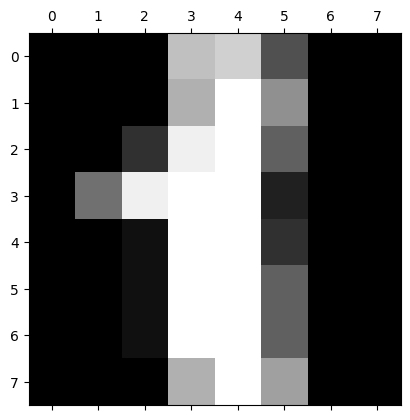

In [ ]:
plt.gray()
plt.matshow(digits.data[1].reshape(8,8))
plt.show()

In [ ]:
digits.data[0]  # One dimensional Array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digits.data[0].reshape(8,8) # Two dimensional Array

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


# Let's split the data into feature

In [ ]:
# Independent Feature

X = digits.data

# Dependent Feature

y = digits.target

In [ ]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
X.shape

(1797, 64)

In [ ]:
print(y)

[0 1 2 ... 8 9 8]


In [ ]:
print(y.shape)

(1797,)


In [ ]:
df.shape

(1797, 65)

In [ ]:
# Independent columns

x_df = df.drop('Target',axis = 1)

In [ ]:
# Dependent column

y_df = df['Target']

In [ ]:
x_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
y_df

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


# Testing and Training data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size = 0.20,random_state = 42)

In [ ]:
x_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1734,0.0,0.0,3.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,3.0,11.0,16.0,13.0,4.0,0.0
855,0.0,0.0,9.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,14.0,3.0,0.0,0.0
1642,0.0,0.0,0.0,10.0,13.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,11.0,13.0,6.0,0.0,0.0
175,0.0,1.0,10.0,16.0,16.0,11.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,1.0,15.0,14.0,11.0,4.0,0.0,0.0
925,0.0,0.0,6.0,14.0,13.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,4.0,15.0,16.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,1.0,13.0,16.0,16.0,12.0,1.0,0.0,0.0,12.0,...,9.0,0.0,0.0,1.0,14.0,16.0,16.0,11.0,1.0,0.0
1294,0.0,3.0,15.0,16.0,15.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,16.0,5.0,0.0,0.0,0.0,0.0
860,0.0,0.0,9.0,16.0,16.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,14.0,16.0,16.0,2.0,0.0
1459,0.0,0.0,1.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,7.0,0.0,0.0,0.0


In [ ]:
x_test

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1245,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,16.0,2.0,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0
220,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0
1518,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,7.0,0.0,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0
438,0.0,0.0,2.0,12.0,12.0,12.0,9.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,15.0,3.0,0.0,0.0,0.0
1270,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,...,14.0,0.0,0.0,3.0,15.0,16.0,16.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0
1630,0.0,0.0,6.0,16.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,16.0,12.0,1.0,0.0
1037,0.0,0.0,7.0,15.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,11.0,10.0,10.0,0.0,0.0
965,0.0,0.0,7.0,16.0,12.0,1.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,7.0,16.0,16.0,16.0,4.0,0.0


In [ ]:
y_train

,Target
1734,6
855,0
1642,0
175,3
925,0
...,...
1130,3
1294,7
860,2
1459,7


In [ ]:
y_test

,Target
1245,6
220,9
1518,3
438,7
1270,2
...,...
1731,4
1630,3
1037,8
965,3


# Standardize the data

In [ ]:
scaler = StandardScaler()

In [ ]:
# we can pass our data

x_train = scaler.fit_transform(x_train)

In [ ]:
# now let's change the test data

x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(1437, 64)

In [ ]:
x_test.shape

(360, 64)

# Linear Discriminant Analysis


In order to find the number of components required for LDA, we can use a simple formula that is n-1

Just assume that there are n persons so , how many lines we would need to distinguish between the given n persons

If incase , you are having less number of features compared to your class, you need to use min(no_of_features,no_of_classes-1)

In [ ]:
# If we ar having 19 classes and there are 8 features

min(8,19-1)

min(8,18)

8

# In this data we have 64 features , and number of classes are 10

* so , In this case we would use (n-1) = 9


In [ ]:
# object to LDA

LDA = LinearDiscriminantAnalysis(n_components = 9)

In [ ]:
x_train = LDA.fit_transform(x_train,y_train)

fit: learns the class means and compute the LDA projection directions using x_train and y_train


transform: project the original data onto these directions ( typically fewer than the origial dimension)


we are replacing the high -dimensional features with LDA - Reduced_Feature for further steps like (classification using a  model)


fit(x_train,y_train) - learning the best directions (based on the class labels) that seperated the classes

transform(x_train) --> project the data onto those directions to reduce the dimension



In [ ]:
y_train

,Target
1734,6
855,0
1642,0
175,3
925,0
...,...
1130,3
1294,7
860,2
1459,7


In [ ]:
x_test = LDA.transform(x_test)

In [ ]:
x_train

array([[-3.58237017, -1.82036205,  3.00354787, ..., -0.19386593,
        -0.50007375,  0.40930703],
       [-1.80100317, -5.22276097, -0.2949643 , ...,  0.0265648 ,
        -0.22963409, -1.04943511],
       [-3.72212375, -4.66452054,  1.38358504, ..., -0.55908754,
         1.49164952,  0.46660897],
       ...,
       [ 4.59583386,  1.78946073,  1.75367091, ..., -0.79933938,
         0.90072478, -0.05667756],
       [-1.68877425,  1.54411725, -2.61837563, ..., -0.84332676,
         0.47515619, -0.06963443],
       [-0.83972348,  1.63212091,  1.49817706, ..., -1.49463464,
         1.92194133,  0.39084073]])

In [ ]:
x_train.shape

(1437, 9)

In [ ]:
x_test.shape

(360, 9)

In [ ]:
LDA.explained_variance_ratio_

array([0.27851663, 0.19023768, 0.17379022, 0.11077975, 0.08773235,
       0.0654018 , 0.04249174, 0.02968284, 0.02136698])

9 componenets

1 component - explain 27% class seperation
2 component - explain 19% class seperation

Together they explain 99%

In [ ]:
sum(LDA.explained_variance_ratio_)

np.float64(0.9999999999999999)

# Model Building

In [ ]:
x_train.shape

(1437, 9)

In [ ]:
x_test.shape

(360, 9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 3, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 3, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 7, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 8, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 9, 1, 5,
       5, 1, 4, 2, 8, 8, 9, 8, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 3, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

# Evaluate

In [ ]:
print(accuracy_score(y_test,pred))

0.9527777777777777


In [ ]:
import plotly.express as px
import pandas as pd


x_lda = x_train

df_plot = pd.DataFrame({
    'LDA1': x_lda[:,0],  # all rows 1st columns - 1st column - 1st component
    'LDA2':x_lda[:,1],
    'class': y_train


})


fig = px.scatter(df_plot , x = 'LDA1', y = 'LDA2', color = 'class', labels = {'LD1': 'LD1', 'LD2':'LD2'}, opacity = 0.8)


fig.update_layout(title = 'LDA Scatter plot', plot_bgcolor = 'white')


fig.update_xaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey', zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey', showline = True , linewidth = 1 , linecolor = 'black')


fig.update_yaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey', zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey', showline = True , linewidth = 1 , linecolor = 'black')

fig.update_traces(marker = dict(size =5))

fig.show()